# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [ ]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import graphviz

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [8]:
X = df.drop(['Unnamed: 0', 'data_ref', 'id_cliente'], axis=1)
X

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [10]:
plt.close('all')

plt.rc('figure', figsize=(15, 17))
fig, axes = plt.subplots(4, 3)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'sexo', data = X)
sns.barplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_veiculo', data = X)
sns.pointplot(ax = axes[0, 2],y = 'renda', x = 'posse_de_imovel', data = X)
sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'qtd_filhos', data = X)
tipo_renda = sns.pointplot(ax = axes[1, 1],y = 'renda', x = 'tipo_renda', data = X)
educação = sns.pointplot(ax = axes[1, 2],y = 'renda', x = 'educacao', data = X)
sns.pointplot(ax = axes[2, 0],y = 'renda', x = 'estado_civil', data = X)
tipo_residencia = sns.pointplot(ax = axes[2, 1],y = 'renda', x = 'tipo_residencia', data = X)
idade = sns.barplot(ax = axes[2, 2],y = 'renda', x = 'idade', data = X)
tempo_emprego = sns.pointplot(ax = axes[3, 0],y = 'renda', x = 'tempo_emprego', data = X)
sns.pointplot(ax = axes[3, 1],y = 'renda', x = 'qt_pessoas_residencia', data = X)
sns.pointplot(ax = axes[3, 2],y = 'renda', x = 'renda', data = X)

tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
idade.set_xticklabels(idade.get_xticklabels(), rotation=90, horizontalalignment='right')
educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
tipo_residencia.set_xticklabels(tipo_residencia.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.subplots_adjust(wspace=0.4, hspace=0.9)

C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_12636\3727999014.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  tipo_renda.set_xticklabels(tipo_renda.get_xticklabels(), rotation=90, horizontalalignment='right')
C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_12636\3727999014.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  idade.set_xticklabels(idade.get_xticklabels(), rotation=90, horizontalalignment='right')
C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_12636\3727999014.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  educação.set_xticklabels(educação.get_xticklabels(), rotation=90, horizontalalignment='right')
C:\Users\Maria Fernanda\AppData\Local\Temp\ipykernel_12636\3727999014.py:22: UserWarning: set_ti

In [17]:
X_train, X_test = train_test_split(X, train_size=0.75, random_state=100)

In [19]:
X1 = patsy.dmatrices('''np.log(renda) ~ C(sexo) 
                    + C(posse_de_veiculo) 
                    + C(posse_de_imovel)
                    + qtd_filhos 
                    + C(tipo_renda) 
                    + C(educacao, Treatment(2)) 
                    + C(estado_civil) 
                    + C(tipo_residencia, Treatment(1)) 
                    + idade
                    + tempo_emprego
                    + qt_pessoas_residencia 
                    + 1''', X_test)

In [21]:
modelo = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     69.40
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          5.23e-276
Time:                        13:56:39   Log-Likelihood:                -3377.5
No. Observations:                3100   AIC:                             6807.
Df Residuals:                    3075   BIC:                             6964.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5796      0.841      7.825      0.000       4.931       8.228
C(sexo)[T.M]                                          0.7901      0.029     26.814      0.000       0.732       0.848
C(posse_de_veiculo)[T.True]                           0.0592      0.028      2.080      0.038       0.003       0.115
C(posse_de_imovel)[T.True]                            0.0848      0.028      3.037      0.002       0.030       0.140
C(tipo_renda)[T.Bolsista]                             0.2616      0.418      0.625      0.532      -0.559       1.082
C(tipo_renda)[T.Empresário]                           0.1732      0.030      5.790      0.000       0.115       0.232
C(tipo_renda)[T.Pensionista]                         -0.7787      0.724     -1.075      0.282      -2.198       0.641
C(tipo_renda)[T.Servidor público]                     0.0116      0.045      0.256      0.798      -0.077       0.100
C(educacao, Treatment(2))[T.Primário]                -0.0938      0.150     -0.626      0.532      -0.388       0.200
C(educacao, Treatment(2))[T.Pós graduação]           -0.0132      0.274     -0.048      0.961      -0.551       0.525
C(educacao, Treatment(2))[T.Superior completo]        0.1305      0.028      4.661      0.000       0.076       0.185
C(educacao, Treatment(2))[T.Superior incompleto]      0.0029      0.068      0.043      0.966      -0.130       0.135
C(estado_civil)[T.Separado]                           0.2747      0.423      0.649      0.516      -0.555       1.104
C(estado_civil)[T.Solteiro]                           0.2307      0.418      0.552      0.581      -0.588       1.050
C(estado_civil)[T.União]                             -0.0183      0.050     -0.365      0.715      -0.117       0.080
C(estado_civil)[T.Viúvo]                              0.2169      0.427      0.508      0.612      -0.620       1.054
C(tipo_residencia, Treatment(1))[T.Aluguel]           0.0001      0.109      0.001      0.999      -0.214       0.214
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0176      0.060     -0.293      0.769      -0.135       0.100
C(tipo_residencia, Treatment(1))[T.Comunitário]       0.0012      0.168      0.007      0.994      -0.328       0.330
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3866      0.155      2.487      0.013       0.082       0.691
C(tipo_residencia, Treatment(1))[T.Governamental]    -0.0174      0.076     -0.227      0.820      -0.167       0.132
qtd_filhos                                           -0.1569      0.420     -0.373      0.709      -0.981       0.667
idade                                                 0.0090      0.002      5.607      0.000       0.006       0.012
tempo_emprego  

In [23]:
modelo1 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.001)

modelo1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          2.34e-284
Time:                        13:56:52   Log-Likelihood:                -3378.5
No. Observations:                3100   AIC:                             6791.
Df Residuals:                    3084   BIC:                             6894.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             6.5725      0.839      7.830      0.000       4.927       8.218
C(sexo)[T.M]                                          0.7877      0.029     26.919      0.000       0.730       0.845
C(posse_de_veiculo)[T.True]                           0.0592      0.028      2.085      0.037       0.004       0.115
C(posse_de_imovel)[T.True]                            0.0868      0.028      3.146      0.002       0.033       0.141
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                           0.1719      0.029      5.895      0.000       0.115       0.229
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]        0.1333      0.027      4.900      0.000       0.080       0.187
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                           0.2754      0.422      0.652      0.514      -0.553       1.104
C(estado_civil)[T.Solteiro]                           0.2313      0.417      0.554      0.579      -0.587       1.049
C(estado_civil)[T.União]                             -0.0190      0.050     -0.380      0.704      -0.117       0.079
C(estado_civil)[T.Viúvo]                              0.2167      0.426      0.508      0.611      -0.619       1.053
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]      -0.0145      0.060     -0.243      0.808      -0.131       0.102
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]           0.3884      0.155      2.502      0.012       0.084       0.693
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                           -0.1600      0.420     -0.381      0.703      -0.983       0.663
idade                                                 0.0090      0.002      5.680      0.000       0.006       0.012
tempo_emprego  

In [25]:
modelo2 = smf.ols(X1, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.005)

modelo2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     399.2
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          1.20e-277
Time:                        13:57:01   Log-Likelihood:                -3426.2
No. Observations:                3100   AIC:                             6862.
Df Residuals:                    3096   BIC:                             6893.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2105      0.061    117.582      0.000       7.090       7.331
C(sexo)[T.M]                                          0.7885      0.028     28.434      0.000       0.734       0.843
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0080      0.001      5.386      0.000       0.005       0.011
tempo_emprego  

In [27]:
modelo3 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.01)

modelo3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     322.6
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          1.13e-278
Time:                        13:57:08   Log-Likelihood:                -3420.8
No. Observations:                3100   AIC:                             6854.
Df Residuals:                    3095   BIC:                             6890.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.1731      0.062    115.192      0.000       7.051       7.295
C(sexo)[T.M]                                          0.7883      0.028     28.472      0.000       0.734       0.843
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                            0.0910      0.028      3.297      0.001       0.037       0.145
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0074      0.001      4.988      0.000       0.004       0.010
tempo_emprego  

In [29]:
modelo4 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.05)

modelo4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     399.2
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          1.20e-277
Time:                        13:57:17   Log-Likelihood:                -3426.2
No. Observations:                3100   AIC:                             6862.
Df Residuals:                    3096   BIC:                             6893.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2105      0.061    117.582      0.000       7.090       7.331
C(sexo)[T.M]                                          0.7885      0.028     28.434      0.000       0.734       0.843
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0080      0.001      5.386      0.000       0.005       0.011
tempo_emprego  

In [31]:
modelo5 = smf.ols(X1, data = X_test).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = 0.1)

modelo5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     399.2
Date:                Wed, 25 Jun 2025   Prob (F-statistic):          1.20e-277
Time:                        13:57:26   Log-Likelihood:                -3426.2
No. Observations:                3100   AIC:                             6862.
Df Residuals:                    3096   BIC:                             6893.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             7.2105      0.061    117.582      0.000       7.090       7.331
C(sexo)[T.M]                                          0.7885      0.028     28.434      0.000       0.734       0.843
C(posse_de_veiculo)[T.True]                                0          0        nan        nan           0           0
C(posse_de_imovel)[T.True]                                 0          0        nan        nan           0           0
C(tipo_renda)[T.Bolsista]                                  0          0        nan        nan           0           0
C(tipo_renda)[T.Empresário]                                0          0        nan        nan           0           0
C(tipo_renda)[T.Pensionista]                               0          0        nan        nan           0           0
C(tipo_renda)[T.Servidor público]                          0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Primário]                      0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Pós graduação]                 0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior completo]             0          0        nan        nan           0           0
C(educacao, Treatment(2))[T.Superior incompleto]           0          0        nan        nan           0           0
C(estado_civil)[T.Separado]                                0          0        nan        nan           0           0
C(estado_civil)[T.Solteiro]                                0          0        nan        nan           0           0
C(estado_civil)[T.União]                                   0          0        nan        nan           0           0
C(estado_civil)[T.Viúvo]                                   0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Aluguel]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Com os pais]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Comunitário]            0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Estúdio]                0          0        nan        nan           0           0
C(tipo_residencia, Treatment(1))[T.Governamental]          0          0        nan        nan           0           0
qtd_filhos                                                 0          0        nan        nan           0           0
idade                                                 0.0080      0.001      5.386      0.000       0.005       0.011
tempo_emprego  

In [33]:
X_test['log_renda']=np.log(X_test['renda'])

In [35]:
X_test['pred'] = modelo.predict(X_test)
r = X_test[['pred', 'log_renda']].corr().iloc[0,1]
r**2

0.3606978966279913

In [37]:
X_test['pred1'] = modelo1.predict(X_test)
r = X_test[['pred1', 'log_renda']].corr().iloc[0,1]
r**2

0.360270465474455

In [39]:
X_test['pred2'] = modelo2.predict(X_test)
r = X_test[['pred2', 'log_renda']].corr().iloc[0,1]
r**2

0.34029296484715227

In [41]:
X_test['pred3'] = modelo3.predict(X_test)
r = X_test[['pred3', 'log_renda']].corr().iloc[0,1]
r**2

0.34260135702579464

In [43]:
X_test['pred4'] = modelo4.predict(X_test)
r = X_test[['pred4', 'log_renda']].corr().iloc[0,1]
r**2

0.34029296484715227

In [45]:
X_test['pred5'] = modelo5.predict(X_test)
r = X_test[['pred5', 'log_renda']].corr().iloc[0,1]
r**2

0.34029296484715227

In [47]:
plt.close('all')

plt.rc('figure', figsize=(10, 10))
fig, axes = plt.subplots(2, 2)

sns.barplot(ax = axes[0, 0],y = 'renda', x = 'posse_de_veiculo', data = X)
sns.pointplot(ax = axes[0, 1],y = 'renda', x = 'posse_de_imovel', data = X)
sns.pointplot(ax = axes[1, 0],y = 'renda', x = 'qtd_filhos', data = X)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   15000 non-null  object 
 1   posse_de_veiculo       15000 non-null  bool   
 2   posse_de_imovel        15000 non-null  bool   
 3   qtd_filhos             15000 non-null  int64  
 4   tipo_renda             15000 non-null  object 
 5   educacao               15000 non-null  object 
 6   estado_civil           15000 non-null  object 
 7   tipo_residencia        15000 non-null  object 
 8   idade                  15000 non-null  int64  
 9   tempo_emprego          12427 non-null  float64
 10  qt_pessoas_residencia  15000 non-null  float64
 11  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 1.2+ MB


In [53]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [55]:
X_train_a = X_train.dropna()

In [57]:
X_train_b = pd.get_dummies(X_train_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_train_b.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_M,posse_de_veiculo_True,posse_de_imovel_True,tipo_renda_Bolsista,tipo_renda_Empresário,...,educacao_Superior incompleto,estado_civil_Separado,estado_civil_Solteiro,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental
1614,0,34,1.797260,2.0,3160.87,False,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
9327,1,34,9.101370,3.0,6480.13,True,True,True,False,True,...,False,False,False,False,False,True,False,False,False,False
11914,1,37,1.753425,3.0,5847.17,True,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
14579,1,44,7.473973,3.0,10415.23,True,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
10292,1,34,16.583562,3.0,10300.75,False,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [59]:
X_train_a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9327 entries, 1614 to 5640
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   9327 non-null   object 
 1   posse_de_veiculo       9327 non-null   bool   
 2   posse_de_imovel        9327 non-null   bool   
 3   qtd_filhos             9327 non-null   int64  
 4   tipo_renda             9327 non-null   object 
 5   educacao               9327 non-null   object 
 6   estado_civil           9327 non-null   object 
 7   tipo_residencia        9327 non-null   object 
 8   idade                  9327 non-null   int64  
 9   tempo_emprego          9327 non-null   float64
 10  qt_pessoas_residencia  9327 non-null   float64
 11  renda                  9327 non-null   float64
dtypes: bool(2), float64(3), int64(2), object(5)
memory usage: 819.8+ KB


In [61]:
X_train_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9327 entries, 1614 to 5640
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   qtd_filhos                     9327 non-null   int64  
 1   idade                          9327 non-null   int64  
 2   tempo_emprego                  9327 non-null   float64
 3   qt_pessoas_residencia          9327 non-null   float64
 4   renda                          9327 non-null   float64
 5   sexo_M                         9327 non-null   bool   
 6   posse_de_veiculo_True          9327 non-null   bool   
 7   posse_de_imovel_True           9327 non-null   bool   
 8   tipo_renda_Bolsista            9327 non-null   bool   
 9   tipo_renda_Empresário          9327 non-null   bool   
 10  tipo_renda_Pensionista         9327 non-null   bool   
 11  tipo_renda_Servidor público    9327 non-null   bool   
 12  educacao_Pós graduação         9327 non-null   boo

In [63]:
X_train_c = X_train_b.drop(['renda'], axis=1)
y_train_a = X_train_b['renda']

In [ ]:
result = stepwise_selection(X = X_train_c,y = y_train_a)

print('resulting features:')
print(result)

In [67]:
X_train_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)

In [69]:
modelo_m = smf.ols('''np.log(renda) ~  tempo_emprego + 
                                        sexo_M + 
                                        tipo_renda_Empresário + 
                                        idade + 
                                        educacao_Superior_completo + 
                                        qt_pessoas_residencia''', data = X_train_b).fit()
modelo_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     850.1
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:00:31   Log-Likelihood:                -10209.
No. Observations:                9327   AIC:                         2.043e+04
Df Residuals:                    9320   BIC:                         2.048e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              7.1511      0.045    157.244      0.000       7.062       7.240
sexo_M[T.True]                         0.7922      0.016     49.900      0.000       0.761       0.823
tipo_renda_Empresário[T.True]          0.1369      0.017      8.131      0.000       0.104       0.170
educacao_Superior_completo[T.True]     0.1107      0.016      7.122      0.000       0.080       0.141
tempo_emprego                          0.0628      0.001     52.346      0.000       0.060       0.065
idade                                  0.0049      0.001      5.551      0.000       0.003       0.007
qt_pessoas_residencia                  0.0279      0.008      3.389      0.001       0.012       0.044
==============================================================================
Omnibus:                        0.010   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.995   Jarque-Bera (JB):                0.018
Skew:                           0.001   Prob(JB):                        0.991
Kurtosis:                       2.994   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
X_train_a = X_train.dropna()
X_train_b = pd.get_dummies(X_train_a, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
X_train_b.rename(columns = {'educacao_Superior completo':'educacao_Superior_completo'}, inplace=True)
X_train_b['log_renda']=np.log(X_train_b['renda'])

In [73]:
X_train_b['pred_m'] = modelo_m.predict(X_train_b)
r = X_train_b[['pred_m', 'log_renda']].corr().iloc[0,1]
r**2

0.3537008036698697

In [75]:
modelo_n = smf.ols('np.log(renda) ~  tempo_emprego + sexo_M + idade + qt_pessoas_residencia', data = X_train_b).fit()
modelo_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     1228.
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:00:52   Log-Likelihood:                -10271.
No. Observations:                9327   AIC:                         2.055e+04
Df Residuals:                    9322   BIC:                         2.059e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2829      0.044    164.817      0.000       7.196       7.370
sexo_M[T.True]            0.7827      0.016     49.054      0.000       0.751       0.814
tempo_emprego             0.0621      0.001     51.642      0.000       0.060       0.064
idade                     0.0041      0.001      4.625      0.000       0.002       0.006
qt_pessoas_residencia     0.0236      0.008      2.853      0.004       0.007       0.040
==============================================================================
Omnibus:                        0.048   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.977   Jarque-Bera (JB):                0.062
Skew:                           0.003   Prob(JB):                        0.970
Kurtosis:                       2.989   Cond. No.                         252.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
modelo_o = smf.ols('np.log(renda) ~  tempo_emprego + I(tempo_emprego**2) + sexo_M + idade + qt_pessoas_residencia', data = X_train_b).fit()
modelo_o.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     996.7
Date:                Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:00:59   Log-Likelihood:                -10248.
No. Observations:                9327   AIC:                         2.051e+04
Df Residuals:                    9321   BIC:                         2.055e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.2092      0.045    158.925      0.000       7.120       7.298
sexo_M[T.True]            0.7827      0.016     49.171      0.000       0.751       0.814
tempo_emprego             0.0810      0.003     27.017      0.000       0.075       0.087
I(tempo_emprego ** 2)    -0.0007      0.000     -6.876      0.000      -0.001      -0.001
idade                     0.0043      0.001      4.938      0.000       0.003       0.006
qt_pessoas_residencia     0.0199      0.008      2.408      0.016       0.004       0.036
==============================================================================
Omnibus:                        0.400   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.429
Skew:                           0.012   Prob(JB):                        0.807
Kurtosis:                       2.976   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
cmap = sns.diverging_palette(h_neg=7, h_pos=250, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(X_train_b.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [81]:
regr1 = DecisionTreeRegressor(max_depth=8)
regr2 = DecisionTreeRegressor(max_depth=2)

regr1.fit(X_train_c, y_train_a)
regr2.fit(X_train_c, y_train_a)

DecisionTreeRegressor(max_depth=2)

In [83]:
train1 = regr1.predict(X_train_c)
train2 = regr2.predict(X_train_c)
print('Para base de treinamento:')
print('O mse com profundidade = 8, MSE=', mean_squared_error(y_train_a,train1))
print('O mse com profundidade = 2, MSE=', mean_squared_error(y_train_a,train2))

Para base de treinamento:
O mse com profundidade = 8, MSE= 27828883.89011865
O mse com profundidade = 2, MSE= 57912531.1398187


In [ ]:
data = tree.export_graphviz(regr1, out_file=None, 
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png") 
graph

In [ ]:
data = tree.export_graphviz(regr2, out_file=None, 
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png") 
graph

In [93]:
path = regr1.cost_complexity_pruning_path(X_train_c, y_train_a)

In [95]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

Text(0, 0.5, 'Impureza total das folhas')

In [97]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_c, y_train_a)
    clfs.append(clf)

In [98]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  5))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Profundidade da árvore")

Text(0, 0.5, 'Profundidade da árvore')

In [101]:
train_scores = [mean_squared_error(y_train_a, clf.predict(X_train_c)) for clf in clfs]

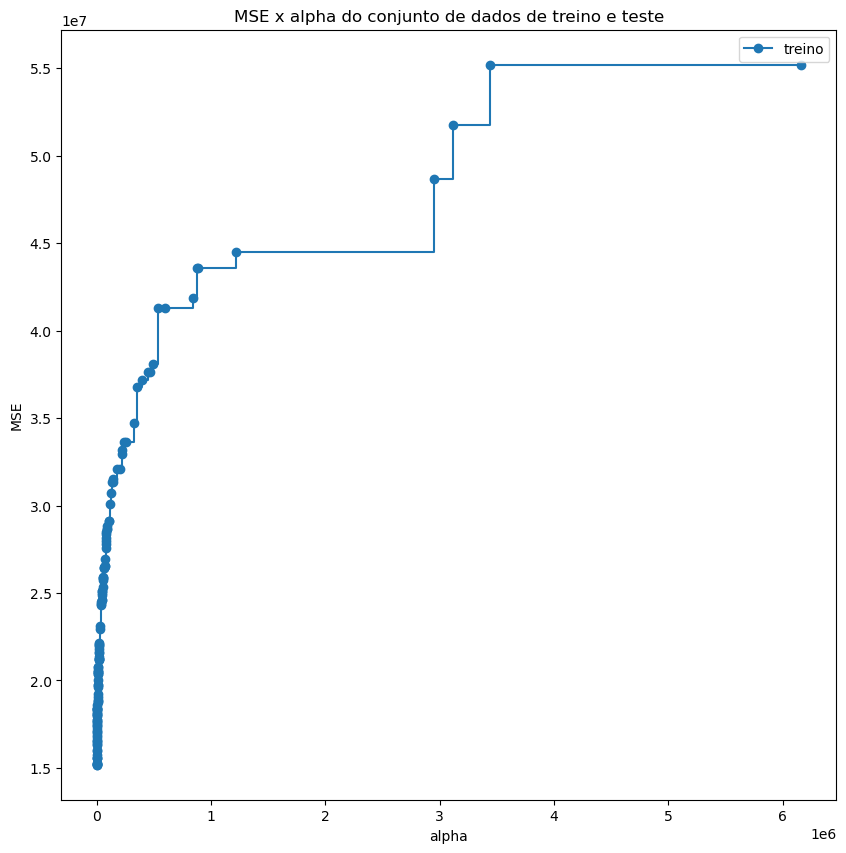

In [105]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [107]:
arvore_final = DecisionTreeRegressor (random_state=0, ccp_alpha=.5)
arvore_final.fit(X_train_c, y_train_a)

print(f'Profundidade: {arvore_final.tree_.max_depth}')
print(f'MSE na base de testes: {mean_squared_error(y_train_a , arvore_final.predict(X_train_c)):.2f}')

Profundidade: 38
MSE na base de testes: 15184218.76


In [ ]:
ata = tree.export_graphviz(regr1, out_file=None, 
                                feature_names=X_train_c.columns,
                                filled=True)

graph = graphviz.Source(data, format="png") 
graph